In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
# Assuming you have uploaded the dataset to your Colab environment
data = pd.read_csv('/content/bank-additional.csv', sep=';')

In [16]:
data.rename(columns={'y':'deposite'},inplace=True)
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposite
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   duration                       4119 non-null   int64  
 2   campaign                       4119 non-null   int64  
 3   pdays                          4119 non-null   int64  
 4   previous                       4119 non-null   int64  
 5   emp.var.rate                   4119 non-null   float64
 6   cons.price.idx                 4119 non-null   float64
 7   cons.conf.idx                  4119 non-null   float64
 8   euribor3m                      4119 non-null   float64
 9   nr.employed                    4119 non-null   float64
 10  deposite                       4119 non-null   object 
 11  job_admin.                     4119 non-null   bool   
 12  job_blue-collar                4119 non-null   b

In [24]:
data.tail()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,False,False,False,False,True,False,False,False,True,False
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,False,False,True,False,False,False,False,False,True,False
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,False,False,False,True,False,False,False,True,False,False
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,False,False,True,False,False,False,False,False,True,False
4118,34,175,1,999,0,-0.1,93.200,-42.0,4.120,5195.8,...,False,False,False,False,False,False,True,False,True,False


In [26]:
data.shape


(4119, 64)

In [27]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'deposite', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov

In [29]:
data.dtypes

,0
age,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
...,...
day_of_week_tue,bool
day_of_week_wed,bool
poutcome_failure,bool
poutcome_nonexistent,bool


In [30]:
data.isna().sum()

,0
age,0
duration,0
campaign,0
pdays,0
previous,0
...,...
day_of_week_tue,0
day_of_week_wed,0
poutcome_failure,0
poutcome_nonexistent,0


In [33]:
cat_cols=data.select_dtypes(include='object').columns
print(cat_cols)
num_cols=data.select_dtypes(exclude='number').columns
print(num_cols)

Index(['deposite'], dtype='object')
Index(['deposite', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

In [35]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [36]:
data.describe(include='object')

,deposite
count,4119
unique,2
top,no
freq,3668


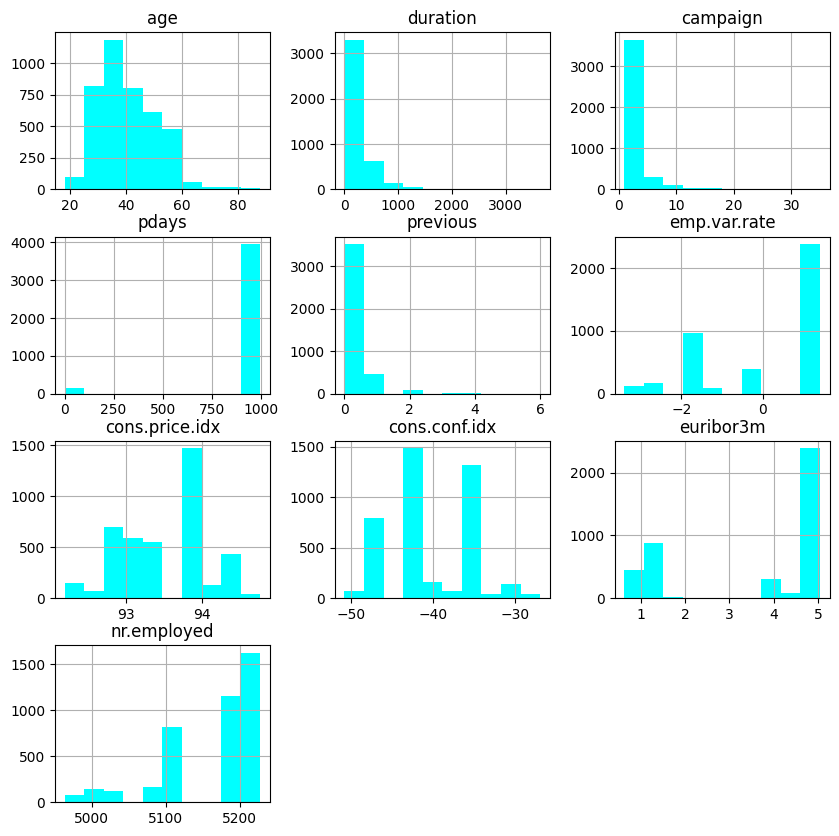

In [37]:
data.hist(figsize=(10,10),color='#00FFFF')
plt.show()

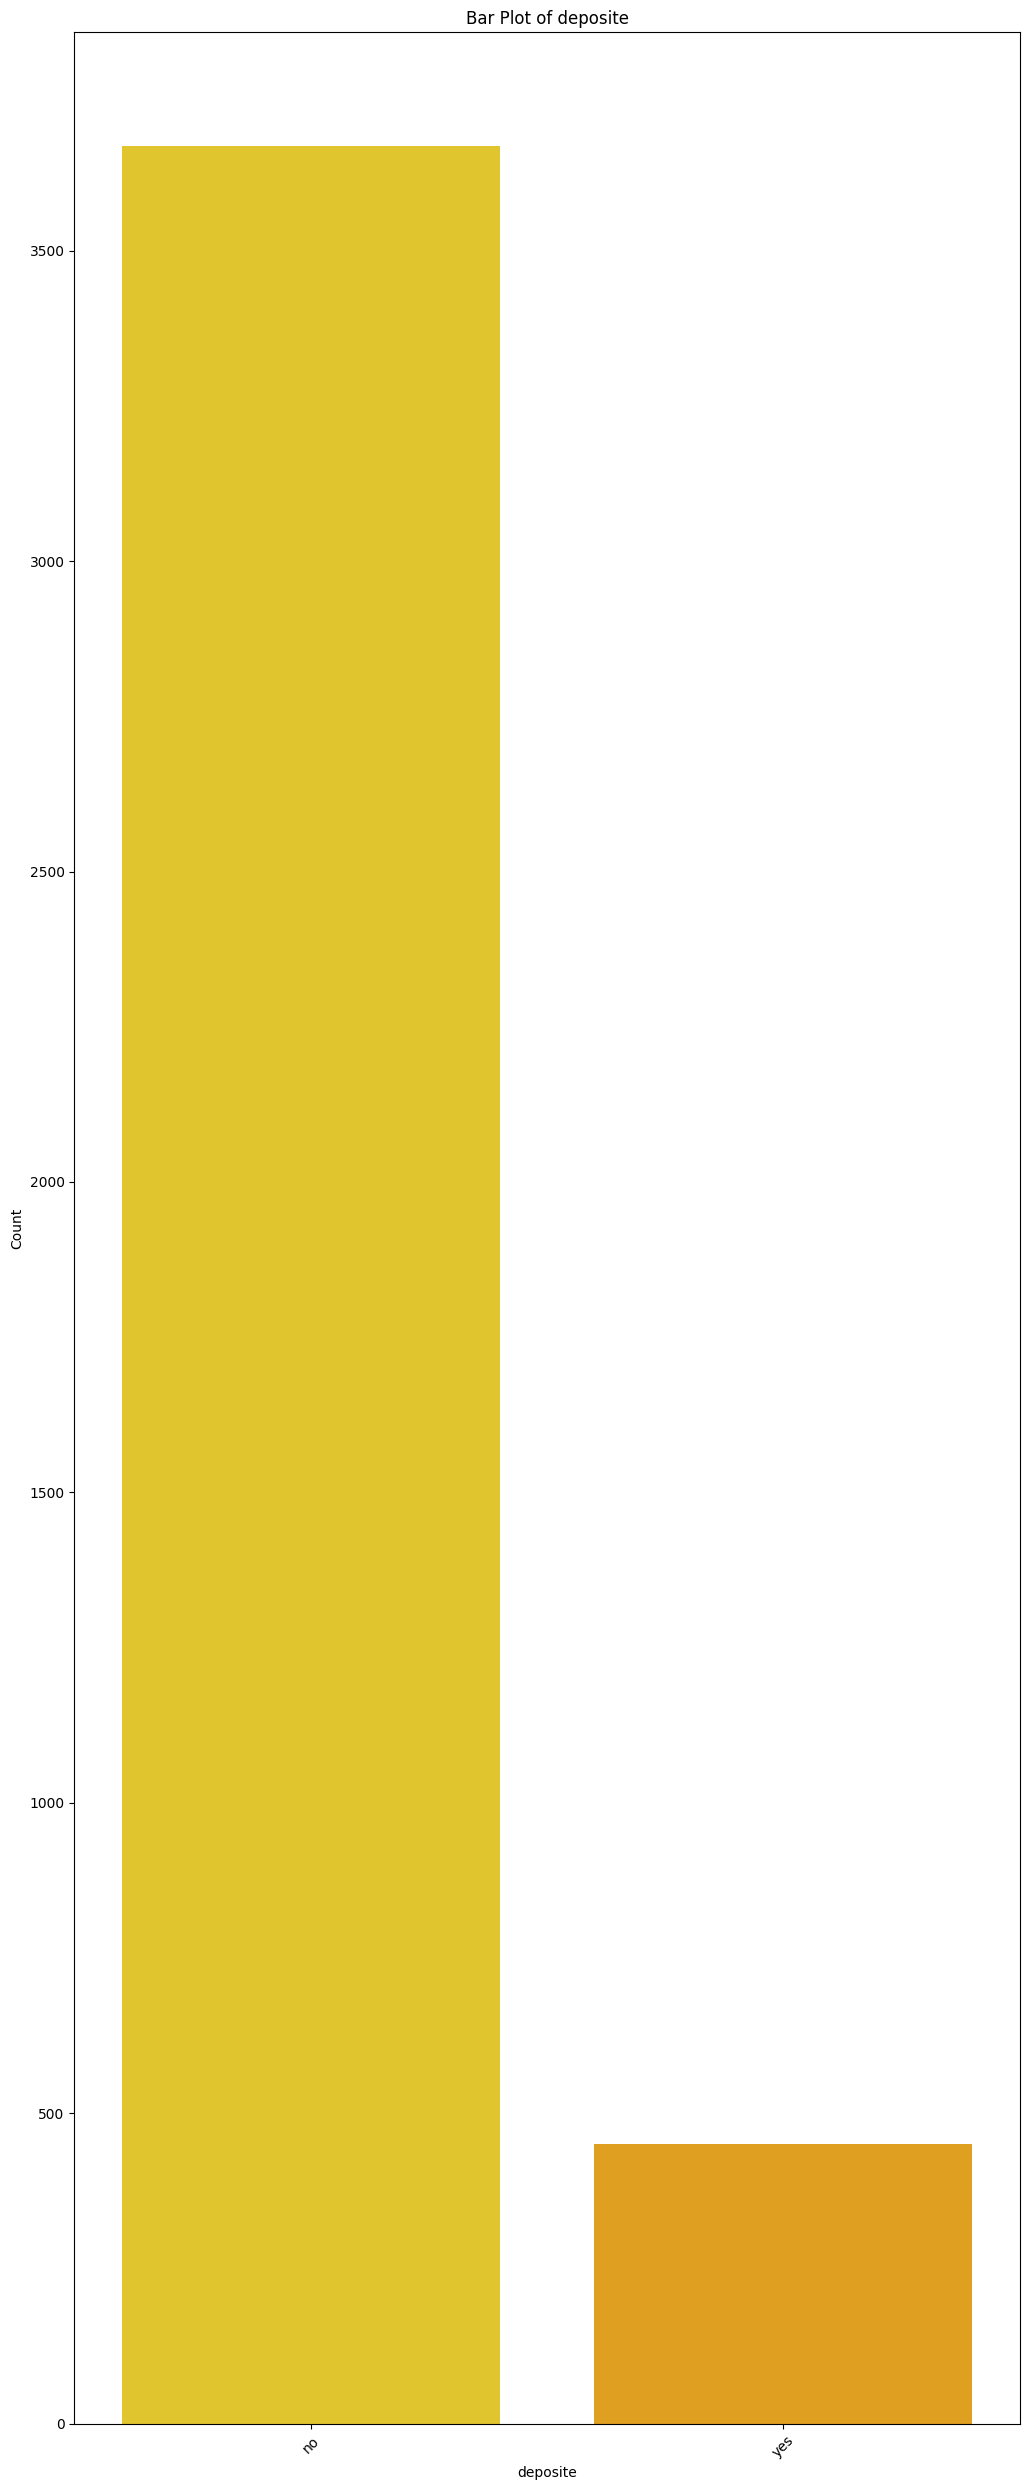

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
df = data  # Assign data to df if you want to use df

# Assuming cat_cols is a list of your categorical columns
# (e.g., cat_cols = ['job', 'marital', 'education', ...])

# Calculate the number of rows and columns for subplots
num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
num_cols = 2

# Create a new figure
plt.figure(figsize=(20, 25))  # Adjust the figure size as needed

# Loop through each feature and create a countplot
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, palette='Wistia')  # Use df here
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

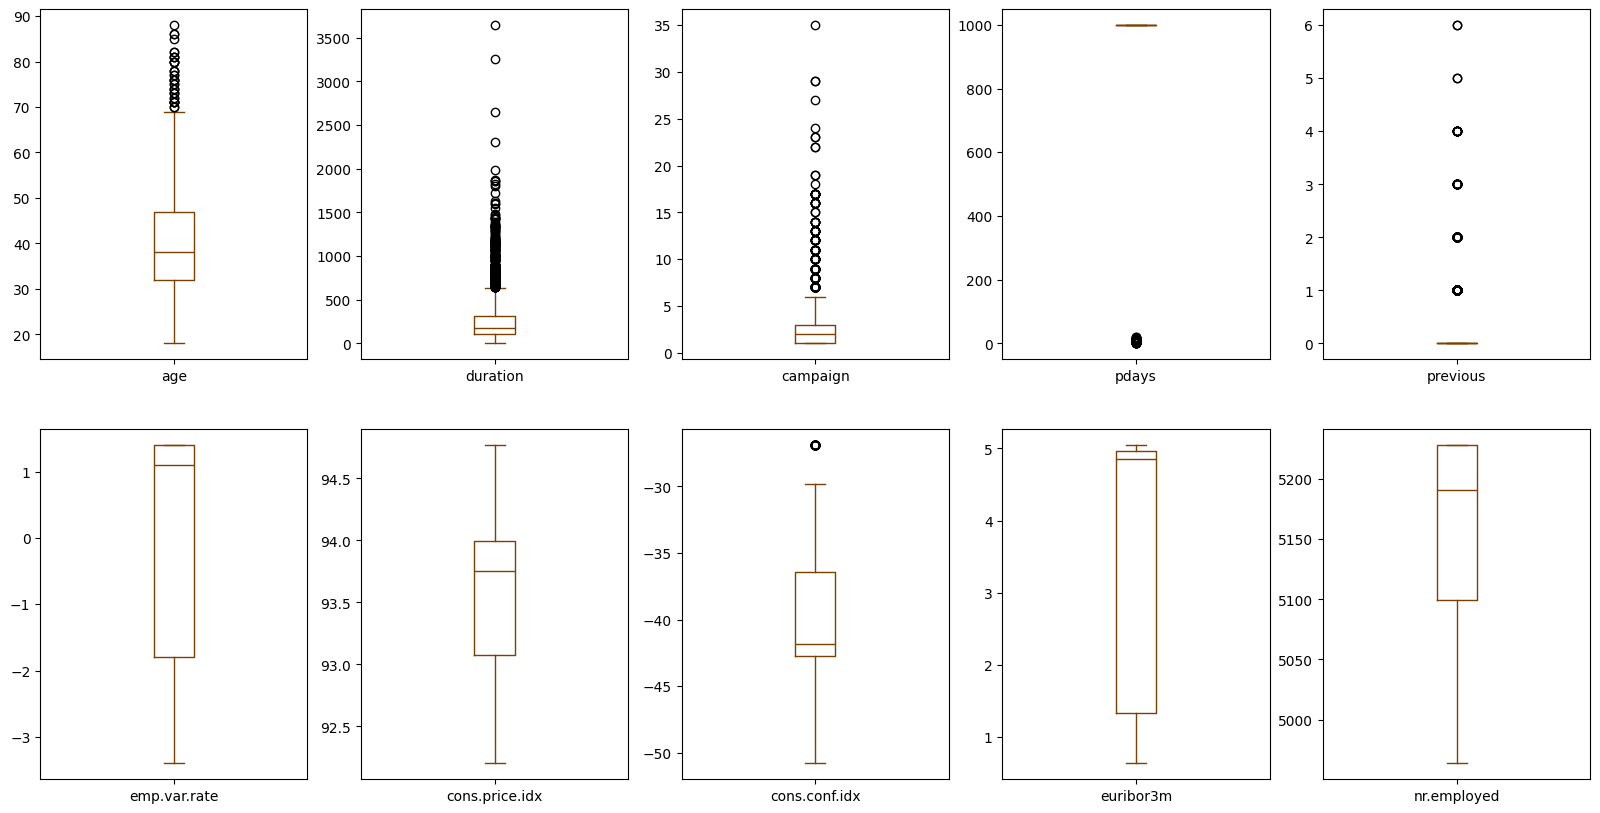

In [47]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [50]:
column = df[['age','campaign','duration']]
q1=np.percentile(column,25)
q3=np.percentile(column,75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df[['age','campaign','duration']]=column[(column>lower_bound)&(column<upper_bound)]

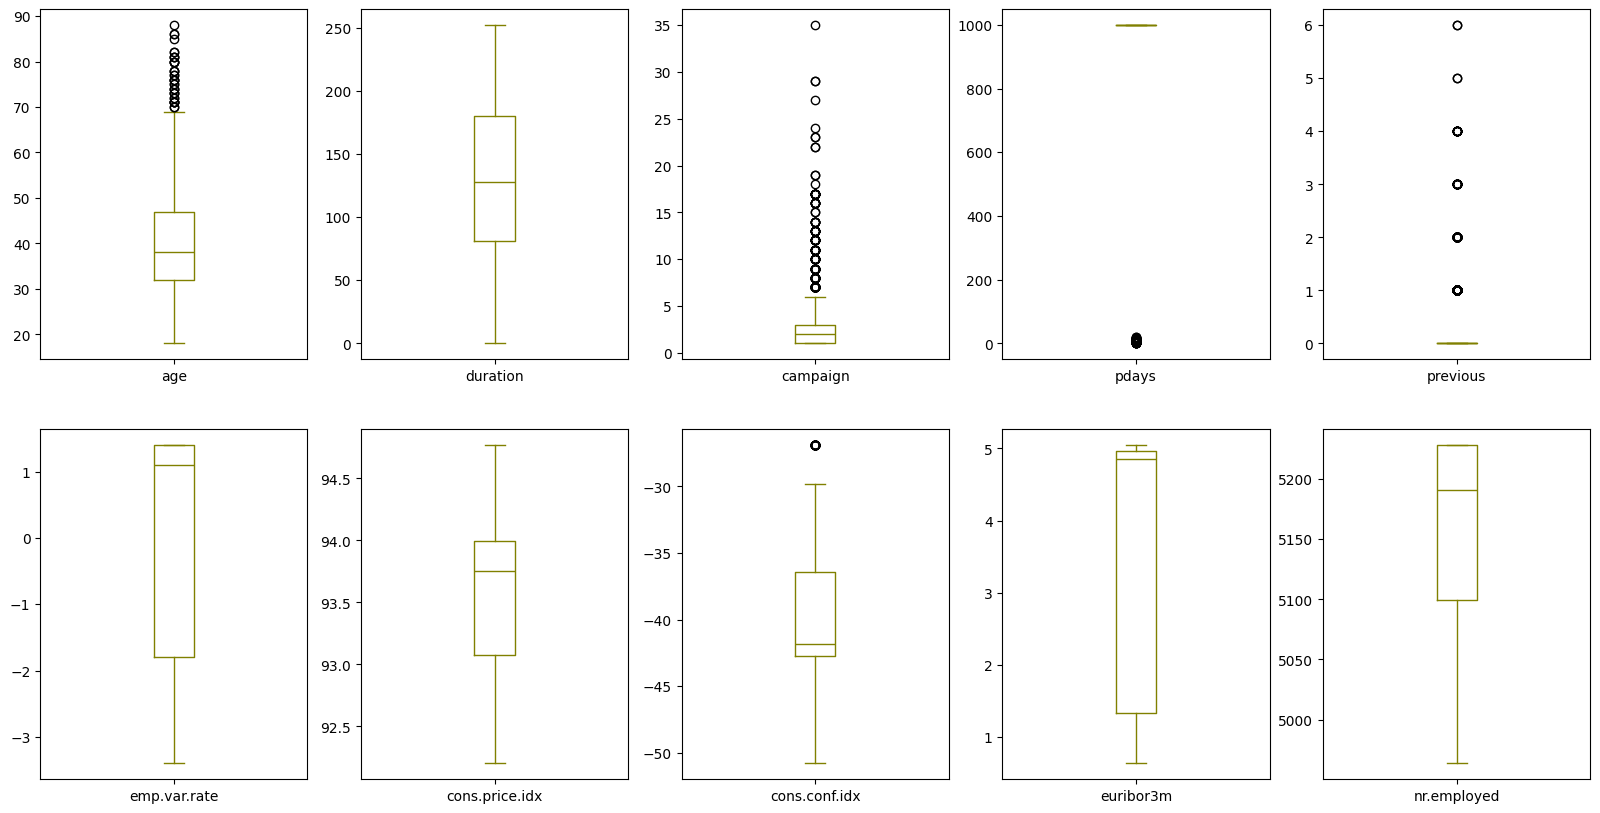

In [52]:
data.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

                           age  duration  campaign     pdays  previous  \
age                   1.000000  0.014048 -0.014169 -0.043425  0.050931   
duration              0.014048  1.000000 -0.218111 -0.093694  0.094206   
campaign             -0.014169 -0.218111  1.000000  0.058742 -0.091490   
pdays                -0.043425 -0.093694  0.058742  1.000000 -0.587941   
previous              0.050931  0.094206 -0.091490 -0.587941  1.000000   
...                        ...       ...       ...       ...       ...   
day_of_week_tue       0.043129  0.010935  0.001210 -0.016659 -0.000082   
day_of_week_wed      -0.062716  0.025447 -0.038121  0.028307 -0.015124   
poutcome_failure      0.009804  0.042581 -0.079376 -0.001093  0.661990   
poutcome_nonexistent -0.031205 -0.084067  0.098957  0.488761 -0.854241   
poutcome_success      0.043341  0.096224 -0.054564 -0.940565  0.510865   

                      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                      -0.019

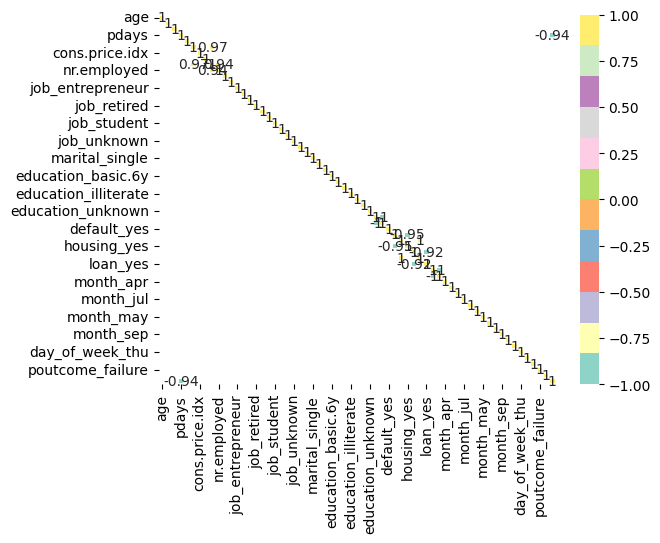

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and cat_cols is defined
df = data  # Assign data to df



numeric_df = df.drop(columns=cat_cols)
corr = numeric_df.corr()
print(corr)

# Filter for correlations >= 0.9 or <= -0.9
corr = corr[abs(corr) >= 0.90]

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='Set3', linewidths=0.2)  # Note: 'Set3' is case-sensitive
plt.show()

Accuracy: 0.8737864077669902


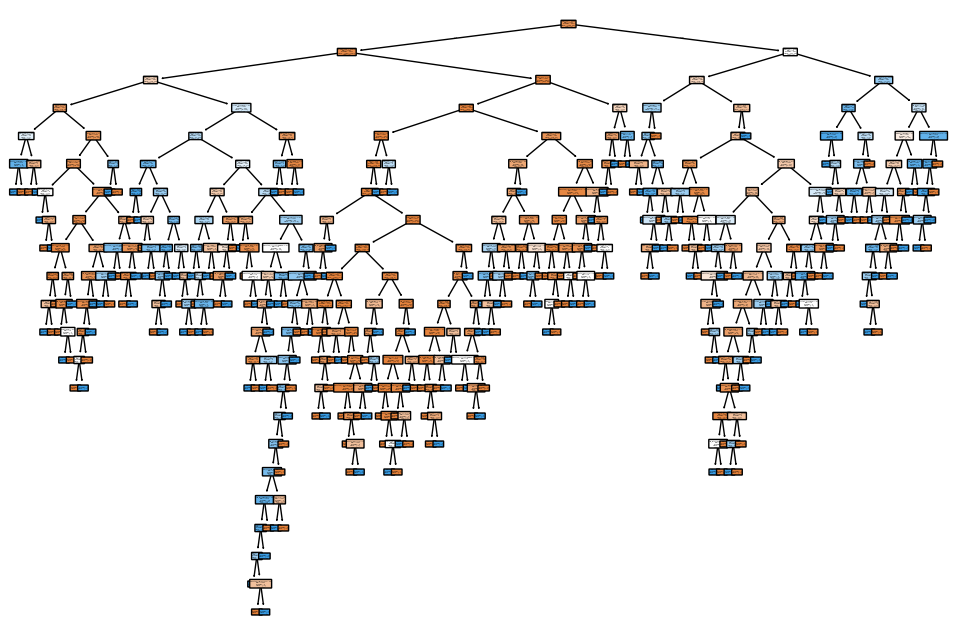

In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/bank-additional.csv', sep=';')

# Rename the target column
data.rename(columns={'y': 'deposit'}, inplace=True)

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'day_of_week', 'poutcome'])

# Separate features (X) and target (y)
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()